In [1]:
using LinearAlgebra

### Função de Taylor

In [2]:
"""
RESUMO: Esse método recebe um ponto a e a imagem de a em uma funcao que nao sabemos calcular diretamente.
        A partir dessas informacoes e das derivadas, aproximamos o valor da imagem de x nessa funcao usando o método
        de Taylor.
ENTRADA: Float Fa (imagem da funcao em a), Vetor 'derivadas', Float a, Float x
SAÍDA: Float soma
"""
function taylor(Fa, derivadas, a, x)
    grau=length(derivadas) #grau do Taylor vai ser implícito
    soma = Fa
    for k = 1:grau
        soma += (derivadas[k] * (x - a)^k) / factorial(k)
    end
    return soma
end

taylor

#### Exemplos

In [3]:
# Exemplo 1 - log(x), a = 1
Fa = 0  # log 1
derivadas = [1, -1, 2]
a = 1.0
x = 1.5
y = taylor(Fa,derivadas,a,x)
y - log(1.5)

0.0112015585585023

In [4]:
# Exemplo 2 - sen(x), a = 0
Fa = 0  # sen(0)
derivadas = [1, 0, -1, 0, 1, 0, -1]
a = 0
x = 0.1
y = taylor(Fa,derivadas,a,x)
y - sin(0.1)

-2.7478019859472624e-15

In [5]:
# Exemplo 3 -> sqrt(x), a = 1
Fa = 1
derivadas = [0.5, -0.25, 3.0/8.0]
a = 1
x = 1.21
y = taylor(Fa,derivadas,a,x)
y - 1.1

6.631249999977662e-5

### Função Bisseção

In [6]:
"""
RESUMO: Este método pode ser usado para encontrar as raízes de uma função contínua, com base 
        no teorema do valor intermediário, tendo f(a) e f(b) com sinais opostos, tem de se ter
        uma raíz entre a e b. O método consiste em dividir o intervalo no seu ponto médio 
        c=(a+b)/2, e então verificar em qual dos dois subintervalos garante-se a existência de
        uma raiz. Para tanto, basta verificar se  f(a)*f(c)<0. Caso afirmativo, existe pelo 
        menos uma raiz no intervalo (a,c), caso contrário garante-se a existência de uma raiz
        no intervalo [c,b). O procedimento é, então, repetido para o subintervalo correspondente
        à raiz até que c se aproxime a raiz com a precisão desejada.
ENTRADA: função, precisao, a, b
SAÍDA: raiz
"""

function bissecao(funcao, precisao, a, b ;max_tempo = 10.0, max_iter = 100)
    # Limitamos o tempo e o número de iterações, pois estamos usando while e não queremos cair
    # em um loop infinito
    fa = f(a) # Função aplicada em a
    fb = f(b) # Função aplicada em b
    ϵ  = precisao *max(abs(fa), abs(fb)) 
    # Em caso dos valores dos pontos na função serem próximos o suficiente de 0 para não 
    # executar o código
    if abs(fa) ≤ ϵ 
        print("a é próximo de ϵ")
        return a
    elseif abs(fb)≤ ϵ 
        print("b é próximo de ϵ")
        return b
    elseif fa*fb ≥ 0
        return "ERRO: F(A) E F(B) TEM SINAIS IGUAIS"
    end
    ϵba  = precisao * abs(b-a) # Calculando o tamanho do erro que é possível, com base na precisão
    
    c = (a+b)/2 # Calculando um x que é o meio entre a e b
    fc = f(c) # Calculando a função no ponto c
    # Inicializando as variáveis de tempo e iteração
    iter =0 
    t0 = time()
    Δt = time() - t0
    
    # Será resolvido quando o módulo de b-a * precisão for menor do que b-a, ou seja a distância
    # seja desse valor ou se o módulo de f(c) seja suficientemente perto de 0, segundo a precisão
    resolvido = (abs(fc) ≤ ϵ || abs(b-a) ≤ ϵba) 
    
    cansado = (iter ≥ max_iter || Δt ≥ max_tempo)
    # LOOP do método da bisseção
    # Vamos fazendo calculando o intervalo entre a e b até encontrar algum f(c) ≈ 0, dentro da
    # precisão ou o intervalo entre b-a menor que a precisão
    while !(resolvido || cansado)
        if fa *fc < 0
            b = c
            fb = fc
        else
            a = c
            fa = fc
        end
        
        c = (a+b)/2
        fc = f(c)
        iter +=1
        Δt = time()-t0
        
        resolvido = (abs(fc) ≤ ϵ || abs(b-a) ≤ ϵba)
        cansado = (iter ≥ max_iter || Δt ≥ max_tempo)
    end
    if resolvido
        return c
    elseif cansado
        if iter ≥ max_iter
            return "ERRO: Chegamos ao número máximo de iterações"
        else
            return "ERRO: Chegamos ao máximo de tempo de execução"
        end
    end
end

bissecao (generic function with 1 method)

#### Exemplos

In [7]:
# Exemplo 1
f(x) = sin(x)
b = 1
a = 5
# Sabemos que sen(π) = 0
precisao = 1e-8
bissecao(f, precisao, a, b)

3.141592651605606

In [8]:
# Exemplo 2
f(x) = (x^3)-1
# Sabemos que a raíz nesse ponto é 1, pois (1^3)-1 = 0
b = -5
a = 5
precisao = 1e-16
bissecao(f, precisao, a, b)

0.9999999999999964

In [9]:
# Exemplo 3
f(x) = (ℯ^x)-1
b = -10
a = 10
precisao = 1e-10
# Sabemos que e^0-1 = 0
bissecao(f, precisao, a, b)

0.0

### Função Ponto Fixo

In [10]:
"""
RESUMO: É uma função que encontra raíz e consiste em encontrar uma função g : [a, b] → R tal
        que g(x) = x e com isso, construir uma sequência xn de pontos da forma xn = g(xn−1),
        para um dada ponto inicial. Seja f : [a, b] → R contínua com f(a) ≤ a 
        e f(b) ≥ b. Existe ao menos um ponto c ∈ [a, b] tal que f(c) = c.
ENTRADA: funcao, precisao, chute_inicial
SAÍDA: raiz
"""

function ponto_fixo(g, precisao, x;
                  max_time = 10.0, max_iter = 1000,)
    
    gx = g(x)
    
    # tolerância do valor da funcao
    ϵ = precisao * abs(gx)
    
    # define variaveis de tempo e qtd de iteraçoes
    iter = 0
    t0 = time()
    Δt = time() - t0
    
    # caso o algoritmo nao termine de nenhuma maneira esperada
    exitflag = :desconhecido
    
    # condicao para o algoritmo ter resolvido o problema
    resolvido = (abs(gx - x) ≤ ϵ)
    
    # condicao para o algoritmo pedir arrego
    cansado = (iter ≥ max_iter || Δt ≥ max_time)
    
    while !(resolvido || cansado)
        # calcula os novos valores de x e g(x)
        x = g(x) 
        gx = g(x)
        
        # calcula condicoes para o while
        iter = iter + 1
        Δt = time() - t0
        resolvido = (abs(gx - x) ≤ ϵ)
        cansado = (iter ≥ max_iter || Δt ≥ max_time)
    end
    
    
    if resolvido
        return x
    elseif cansado
        if iter ≥ max_iter
            return "ERRO: Chegamos ao número máximo de iterações"
        else
            return "ERRO: Chegamos ao máximo de tempo de execução"
        end
    end
    
    return x
end

ponto_fixo (generic function with 1 method)

#### Exemplos:

In [11]:
# Exemplo 1
fg(x) =  sin(x)/π
x = 2
ponto_fixo(fg, 1e-8, x)

3.1652829335191502e-9

In [12]:
# Exemplo 2
fg(x) =  x^3+x^2
x = 2
ponto_fixo(fg, 1e-8, x)

0

In [13]:
# Exemplo 3
fg(x) = 3x^5-7x^3
x = 10
ponto_fixo(fg, 1e-9, x)

0

### Função Newton

In [14]:
"""
RESUMO: Tem-se o objetivo de encontrar uma raíz para a função para isso, escolhe-se uma 
        aproximação inicial para esta. Após isso, calcula-se a equação da reta tangente (por
        meio da derivada) da função nesse ponto e a interseção dela com o eixo das abcissas, a
        fim de encontrar uma melhor aproximação para a raiz. Repetindo-se o processo, cria-se um
        método iterativo para encontrarmos a raiz da função. 
ENTRADA: funcao,derivada, precisao, chute_inicial
SAÍDA: raiz
"""

function newton(funcao,derivada, precisao, chute_inicial;
        max_tempo = 10.0, max_iter = 1000)
    x= chute_inicial
    fx = funcao(x) 
    ϵ  = precisao *abs(fx) #Calculando a ϵ com base na precisão dada
    #Inicialização de variáveis
    iter =0
    t0 = time()
    Δt = time() - t0
    
    # Quando tivermos um valor de fx próximo o suficiente de 0, com base no ϵ
    resolvido = (abs(fx) ≤ ϵ) 
    cansado = (iter ≥ max_iter || Δt ≥ max_tempo) 
    # Aqui é onde temos o cálculo 
    while !(resolvido || cansado)
        fdx = derivada(x) # Calculando a derivada 
        if abs(fdx) ≤ ϵ
            return "ERRO: DERIVADA NULA"
        end
          
        x = x-fx/fdx # Calculando a equação do método de newton
        fx = f(x)
        iter +=1
        Δt = time()-t0
        
        resolvido = (abs(fx) ≤ ϵ)
        cansado = (iter ≥ max_iter || Δt ≥ max_tempo)
    end
    if resolvido
        return x
    elseif cansado
        if iter ≥ max_iter
            return "ERRO: Chegamos ao número máximo de iterações"
        else
            return "ERRO: Chegamos ao máximo de tempo de execução"
        end
    end
end

newton (generic function with 1 method)

#### Exemplos

In [15]:
# Exemplo 1
f(x) = x^5+x^2
fd(x) = 5x^4+2x
x = -15
newton(f,fd, 1e-8, x)

-1.0002056482183954

In [16]:
# Exemplo 2
f(x) = sin(x)
fd(x) = cos(x)
x = 2
newton(f,fd, 1e-8, x)

3.1415926536808043

In [17]:
# Exemplo 3
f(x) = 3x^5-7x^3+2
fd(x) = 15x^4-21x^2
x = 0.2
newton(f,fd, 1e-8, x)

1.4549501501230384

### Resolver PVI - Método de Euler

In [18]:
"""
RESUMO: O método de Euler consiste em resolver uma equação diferencial ordinária. Á ideia é 
        encontrar uma solução numérica para a equação diferencial no intervalo entre x_inicial
        e x_f. Primeiro, o intervalo é discretizado em n + 1 pontos: 
            x_0 , x_1 , x_2 , x_3 …, x_n
        Que são obtidos assim:
            x_i = x + ih
        Onde h é a largura ou o tom dos subintervalos:
            (x_final-x_inicial)/numero_iterações
        Com a condição inicial, também é possível conhecer a derivada no início:
            y ‘(x_0) = f (x_0, y_0)
        Essa derivada representa a inclinação da reta tangente à curva da função y (x) exatamente
        no ponto:
            Ao = (x o , y o )
        Em seguida, uma previsão aproximada do valor da função y (x) é feita no seguinte ponto:
            y (x_1)≈ y_1
            y_1 = y_0 + (x_1 – x_0) f (x_0, y_0) = y_0 + hf (x_0, y_0)
        O próximo ponto aproximado da solução que corresponderia a:
            A_1 = (x_1, y_1)
        O procedimento é repetido para obter os pontos sucessivos
            A_2 , A_3 …, x_n
ENTRADA: derivada, x_inicial, y_inicial, x_final, n
SAÍDA: x,y
"""

function resolver_PVI(derivada,x_inicial,y_inicial,x_final,n)
    h =(x_final-x_inicial)/n
    y = y_inicial
    x = x_inicial
    for i = 1:n
        y = y + h * derivada(x, y)
        x = x + h
    end
    return x, y
end

resolver_PVI (generic function with 1 method)

#### Exemplos:

In [19]:
# Exemplo 1
derivada(x,y) = (x - y)/x
x_inicial = 2
y_inicial = 2
x_final = 3
n = 10
resolver_PVI(derivada,x_inicial,y_inicial,x_final,n)

(3.000000000000001, 2.155172413793104)

In [20]:
# Exemplo 2
derivada(x,y) = (x^2 - y)/x
x_inicial = 2
y_inicial = 2
x_final = 3
n = 10
resolver_PVI(derivada,x_inicial,y_inicial,x_final,n)

(3.000000000000001, 3.408620689655173)

In [21]:
# Exemplo 3
derivada(x,y) = cos(x)-sin(y)
x_inicial = 2
y_inicial = 2
x_final = 3
n = 10
resolver_PVI(derivada,x_inicial,y_inicial,x_final,n)

(3.000000000000001, 0.4018171518643542)

### Resolver PVC

In [22]:
# Não dá para ser feita genericamente
function resolver_PVC(segunda_derivada, x_inicial, y_inicial, x_final, y_final, n)
     A,b = # Usuário monta um sistema linear usando diferenças finitas (segunda_derivada(x,y), x_inicial, y_inicial, x_final, y_final,n)
     y = resolver_um_sistema(A,b)
return y
end

resolver_PVC (generic function with 1 method)

### Resolve Diagonal

In [23]:
# Resolve diagonal
""""
RESUMO: Resolve um sistema linear Ax=b que tenha uma matriz diagonal
ENTRADA: Matriz A, vetor b
SAIDA: vetor x (solucao do sistema)
"""

function resolve_diagonal(A, b)
    rows, cols = size(A)
    
    # verifica se a matriz é quadrada
    if rows != cols
        error("A matriz deve ser quadrada!")
    end
    
    # Inicializa o vetor solucao
    x = zeros(rows)
    
    # Calcula cada elemento do vetor x
    # Dividindo o valor de cada linha de b pelos valores na diagonal de A
    for i = 1:rows
        x[i] = b[i] / A[i,i]
    end
    
    return x
end

resolve_diagonal (generic function with 1 method)

#### Exemplo 1 (n = 3)

In [24]:
A = [2  0   0;
     0  7   0;
     0  0 -11]

b = [-6, 7, 110]

x = resolve_diagonal(A, b)

norm(A*x - b)

0.0

#### Exemplo 2 (n = 5)

In [25]:
n = 5
A = Diagonal(rand(5,5))

b = rand(5)

x = resolve_diagonal(A, b)

norm(A * x - b)

0.0

#### Exemplo 3 (n = 20)

In [26]:
n = 20
A = Diagonal(rand(n, n))
b = rand(n)
x = resolve_diagonal(A, b)
norm(A*x - b)

1.1102230246251565e-16

### Resolve Triangular Superior

In [27]:
# Resolve triangular superior
""""
RESUMO: Resolve um sistema linear Ax=b que tenha uma matriz triangular superior.
        Ou seja, todos os elementos abaixo da diagonal estao zerados.
ENTRADA: Matriz A, vetor b
SAIDA: vetor x (solucao do sistema)
"""

function resolve_triangular_superior(A, b)
    rows, cols = size(A)
    
    # verifica se a matriz é quadrada
    if rows != cols
        error("A matriz deve ser quadrada!")
    end
    
    # Inicializa o vetor solucao
    x = zeros(rows)
    
    # Calcula cada elemento do vetor x
    # substituindo em cada linha, de baixo para cima
    for i = rows:-1:1
        x[i] = b[i]  # pegamos o bᵢ
        for j = i+1:cols
            x[i] -= A[i, j] * x[j]  # subtraimos de bᵢ todos os x's que ja 
                                    # foram calculados (multiplicados pelos coeficientes)
        end
        x[i] = x[i] / A[i, i]  # Dividimos o resultado pelo coeficiente de xᵢ
    end
    
    return x
end

resolve_triangular_superior (generic function with 1 method)

#### Exemplo 1 (n = 3)

In [28]:
A = [-2    7  19;
      0  0.5 -10;
      0    0   3]

3×3 Array{Float64,2}:
 -2.0  7.0   19.0
  0.0  0.5  -10.0
  0.0  0.0    3.0

In [29]:
b = [2, 8.5, -11]

3-element Array{Float64,1}:
   2.0
   8.5
 -11.0

In [30]:
x = resolve_triangular_superior(A, b)

3-element Array{Float64,1}:
 -233.0
  -56.33333333333333
   -3.6666666666666665

In [31]:
norm(A*x - b)

2.842170943040401e-14

#### Exemplo 2 (n = 5)

In [32]:
n = 5
A = UpperTriangular(rand(n,n))
b = rand(n)
x = resolve_triangular_superior(A, b)
norm(A*x - b)

2.0014830212433605e-16

#### Exemplo 3 (n = 20)

In [33]:
n = 20
A = UpperTriangular(rand(n,n))
b = rand(n)
x = resolve_triangular_superior(A, b)
norm(A*x - b)

1.344047435343457e-13

### Resolve Triangular Inferior

In [34]:
# Resolve triangular inferior
""""
RESUMO: Resolve um sistema linear Ax=b que tenha uma matriz triangular inferior.
        Ou seja, todos os elementos acima da diagonal estao zerados.
ENTRADA: Matriz A, vetor b
SAIDA: vetor x (solucao do sistema)
"""

function resolve_triangular_inferior(A, b)
    rows, cols = size(A)
    
    # verifica se a matriz é quadrada
    if rows != cols
        error("A matriz deve ser quadrada!")
    end
    
    # Inicializa o vetor solucao
    x = zeros(rows)
    
    # Calcula cada elemento do vetor x
    # substituindo em cada linha, de cima para baixo
    for i = 1:rows
        x[i] = b[i]  # pegamos o bᵢ
        for j = i-1:-1:1
            x[i] -= A[i, j] * x[j]  # subtraimos de bᵢ todos os x's que ja 
                                    # foram calculados (multiplicados pelos coeficientes)
        end
        x[i] = x[i] / A[i, i]  # Dividimos o resultado pelo coeficiente de xᵢ
    end
    
    return x
end

resolve_triangular_inferior (generic function with 1 method)

#### Exemplo 1 (n = 3)

In [35]:
A = [  9    0   0;
      -7    1   0;
    56.3   85  -2]

3×3 Array{Float64,2}:
  9.0   0.0   0.0
 -7.0   1.0   0.0
 56.3  85.0  -2.0

In [36]:
b = [30, 2.75, -4.1]

3-element Array{Float64,1}:
 30.0
  2.75
 -4.1

In [37]:
x = resolve_triangular_inferior(A, b)

3-element Array{Float64,1}:
    3.3333333333333335
   26.083333333333336
 1204.425

In [38]:
norm(A*x - b)

9.059419880941277e-14

#### Exemplo 2 (n = 5)

In [39]:
n = 5
A = LowerTriangular(rand(n,n))
b = rand(n)
x = resolve_triangular_inferior(A, b)
norm(A*x - b)

2.220446049250313e-16

#### Exemplo 3 (n = 20)

In [40]:
n = 20
A = LowerTriangular(rand(n,n))
b = rand(n)
x = resolve_triangular_inferior(A, b)
norm(A*x - b)

6.601394530048832e-14

### Eliminação Gaussiana

In [41]:
"""
RESUMO: Funçao que executa a eliminacao gaussiana em uma matriz A e um vetor b.
ENTRADA: Matriz A, vetor b
SAIDA: Nada
OBS: Modifica as entradas!
"""

function eliminacao_gaussiana(A, b)
    rows, cols = size(A)
    for j = 1:cols
        non_zero_cols = j+1:cols
        for i = j+1:rows
            mᵢⱼ = A[i, j] / A[j, j]  # multiplicador que vai zerar a coluna
            A[i, non_zero_cols] -= mᵢⱼ * A[j, non_zero_cols]  # subtracao das linhas de A
            A[i, j] = 0  # zera cada elemento abaixo do pivô na coluna j
            b[i] -= mᵢⱼ * b[j]  # subtracao das linhas de b
        end
    end
end

eliminacao_gaussiana (generic function with 1 method)

#### Exemplo 1 (n = 3)

In [42]:
n = 3
A = rand(n,n)
Acopy = copy(A)

3×3 Array{Float64,2}:
 0.703064   0.133608  0.707469
 0.0937712  0.208138  0.222803
 0.647296   0.675946  0.808861

In [43]:
b = rand(n)
bcopy = copy(b)

3-element Array{Float64,1}:
 0.528945169202389
 0.557835077470618
 0.36002884347070485

In [44]:
eliminacao_gaussiana(A, b)
A

3×3 Array{Float64,2}:
 0.703064  0.133608   0.707469
 0.0       0.190318   0.128444
 0.0       0.0       -0.215665

In [45]:
b

3-element Array{Float64,1}:
  0.528945169202389
  0.48728701445120354
 -1.542691784953329

In [46]:
# Testar (resolvendo o sistema)
x = resolve_triangular_superior(A, b)
norm(Acopy * x - bcopy)

1.2947314098277875e-15

#### Exemplo 2 (n = 5, x random)

In [47]:
n = 5

5

In [48]:
A = rand(n,n)
Acopy = copy(A)

5×5 Array{Float64,2}:
 0.279028   0.395015   0.386645  0.562743  0.557644
 0.0880968  0.8894     0.768997  0.466216  0.170772
 0.878041   0.848215   0.633783  0.67333   0.920131
 0.36233    0.700813   0.386151  0.413187  0.459361
 0.31071    0.0341095  0.442445  0.363246  0.787025

In [49]:
b = rand(n)
bcopy = copy(b)

5-element Array{Float64,1}:
 0.3119574382306023
 0.05275843755213794
 0.32723934297298407
 0.30545830157720233
 0.8359595900951289

In [50]:
eliminacao_gaussiana(A, b)
A

5×5 Array{Float64,2}:
 0.279028  0.395015   0.386645   0.562743   0.557644
 0.0       0.764683   0.646922   0.288543  -0.00529135
 0.0       0.0       -0.248896  -0.948522  -0.837383
 0.0       0.0        0.0        0.659028   0.66128
 0.0       0.0        0.0        0.0        0.43714

In [51]:
b

5-element Array{Float64,1}:
  0.3119574382306023
 -0.04573491188800913
 -0.6780350695347649
  0.6603757431195102
  0.9635729488360436

In [52]:
# Testar (resolvendo o sistema)
x = resolve_triangular_superior(A, b)
norm(Acopy * x - bcopy)

5.117875266520903e-16

#### Exemplo 3 (n = 20, x random)

In [53]:
n = 20
A = rand(n,n)
Acopy = copy(A)
b = rand(n)
bcopy = copy(b)
eliminacao_gaussiana(A, b)

# Testar (resolvendo o sistema)
x = resolve_triangular_superior(A, b)
norm(Acopy * x - bcopy)

1.746047295500239e-13

### Resolve Cheia

In [54]:
"""
RESUMO: Resolve um sistema linear com uma matriz quadrada "cheia".
        Ou seja, que nao é triangular nem diagonal.
ENTRADA: Matriz A, vetor b
SAIDA: Vetor x, solucao do sistema.
OBS: Modifica as entradas!
"""

function resolve_cheia(A, b)
    eliminacao_gaussiana(A,b)
    x = resolve_triangular_superior(A,b)
    return x
end

resolve_cheia (generic function with 1 method)

#### Exemplo 1 (n = 3)

In [55]:
A = [2   -4      1;
     9   18  -7.34;
     0  0.2     45]
Acopy = copy(A)

3×3 Array{Float64,2}:
 2.0  -4.0   1.0
 9.0  18.0  -7.34
 0.0   0.2  45.0

In [56]:
b = [-1, 84, 4.333]
bcopy = copy(b)

3-element Array{Float64,1}:
 -1.0
 84.0
  4.333

In [57]:
x = resolve_cheia(A, b)

3-element Array{Float64,1}:
 4.43011538689126
 2.486367285350796
 0.08523836762066314

In [58]:
norm(Acopy * x - bcopy)

0.0

#### Exemplo 2 (n = 5)

In [59]:
n = 5
A = rand(n,n)
Acopy = copy(A)
b = rand(n)
bcopy = copy(b)
x = resolve_cheia(A, b)
norm(Acopy * x - bcopy)

4.920258062434079e-16

#### Exemplo 3 (n = 20)

In [60]:
n = 20
A = rand(n,n)
Acopy = copy(A)
b = rand(n)
bcopy = copy(b)
x = resolve_cheia(A, b)
norm(Acopy * x - bcopy)

9.371452987519498e-14

### Decomposição LU 

In [61]:
"""
RESUMO: Aplica a eliminacao gaussiana na matriz e salva os multiplicadores utilizados
        para decompor uma matriz A em uma matriz triangular inferior L(Lower) e uma matriz
        triangular superior U(Upper). A matriz L pode ser utilizada para aplicar a eliminacao
        gaussiana em um vetor com complexidade O(n^2) em vez de O(n^3).
ENTRADA: Matriz A
SAIDA: Matriz L e matriz U
"""

function decomposicao_LU(A)
    rows, cols = size(A)
    U = copy(A)
    # Inicia L como uma matriz identidade
    L = Matrix(1.0I, rows, cols)
    for j = 1:cols
        non_zero_cols = j+1:cols
        for i = j+1:rows
            L[i, j] = U[i, j] / U[j, j]  # multiplicador que vai zerar a coluna
            U[i, non_zero_cols] -= L[i, j] * U[j, non_zero_cols]  # subtracao das linhas de A
            U[i, j] = 0  # zera cada elemento abaixo do pivô na coluna j
        end
    end
    return L, U
end

decomposicao_LU (generic function with 1 method)

#### Exemplo 1 (n = 3)

In [62]:
A = [45  6.777  -1.59;
      3      9   -0.1;
     10     45      1]

3×3 Array{Float64,2}:
 45.0   6.777  -1.59
  3.0   9.0    -0.1
 10.0  45.0     1.0

In [63]:
b = [9.0, 18.0, -75.1]

3-element Array{Float64,1}:
   9.0
  18.0
 -75.1

In [64]:
L, U = decomposicao_LU(A)
L

3×3 Array{Float64,2}:
 1.0        0.0      0.0
 0.0666667  1.0      0.0
 0.222222   5.08809  1.0

In [65]:
U

3×3 Array{Float64,2}:
 45.0  6.777   -1.59
  0.0  8.5482   0.006
  0.0  0.0      1.3228

In [66]:
A - L * U

3×3 Array{Float64,2}:
 0.0   0.0          0.0
 0.0   0.0          0.0
 0.0  -7.10543e-15  0.0

#### Exemplo 2 (n = 5)

In [67]:
n = 5
A = rand(n,n)
b = rand(n)
L, U = decomposicao_LU(A)
A - L*U

5×5 Array{Float64,2}:
  0.0          0.0   0.0           0.0          0.0
  0.0          0.0   0.0           0.0          0.0
 -6.93889e-18  0.0   1.11022e-16  -1.11022e-16  0.0
  0.0          0.0  -1.11022e-16   0.0          0.0
  0.0          0.0   0.0           0.0          0.0

#### Exemplo 3 (n = 20)

In [68]:
n = 20
A = rand(n,n)
b = rand(n)
L, U = decomposicao_LU(A)
A - L*U

20×20 Array{Float64,2}:
  0.0          0.0           0.0          …   0.0           0.0
  0.0          0.0           0.0              0.0           0.0
  0.0          1.38778e-17   0.0              0.0           0.0
  0.0          0.0           0.0              5.55112e-17   0.0
  0.0          0.0           0.0              0.0           4.44089e-16
  0.0          0.0           6.93889e-18  …   1.11022e-16   2.22045e-16
  0.0          0.0           0.0              0.0          -2.22045e-16
  0.0          0.0           0.0              0.0           2.63678e-16
 -2.77556e-17  0.0           0.0              1.11022e-16   2.22045e-16
  0.0          0.0           1.11022e-16      0.0           3.33067e-16
  0.0          0.0           0.0          …  -2.22045e-16   1.9984e-15
  0.0          0.0           0.0              0.0           0.0
  0.0          0.0           0.0             -1.11022e-16  -8.88178e-16
  0.0          0.0           0.0              3.33067e-16  -7.77156e-16
  0.0    

### Resolve Pós-LU 

In [69]:
"""
RESUMO: Esta funcao deve ser utilizada depois que fizemos uma decomposicao LU.
        Quando fazemos essa decomposicao LU em um sistema linear temos o seguinte:

        Ax = b
        LUx = b; y = Ux
        Ly = b
        y = L⁻¹b
        Ux = L⁻¹b
        x = U⁻¹L⁻¹b

        Esta funcao primeiro vai resolver o sistema Ly = b para depois resolver 
        o sistema Ux = y.
        A complexidade dessa funcao é apenas O(n²), contra O(n³) de uma eliminacao 
        gaussiana normal.

ENTRADA: Matriz L, Matriz U, Vetor b
SAIDA: Vetor x (solucao de LUx = b)
"""

function resolve_pos_LU(L, U, b)
    y = resolve_triangular_inferior(L, b)
    x = resolve_triangular_superior(U, y)
    return x
end

resolve_pos_LU (generic function with 1 method)

#### Exemplo 1 (n = 3)

In [70]:
L = [  1     0  0;
      23     1  0;
     -91  1.11  1]

3×3 Array{Float64,2}:
   1.0  0.0   0.0
  23.0  1.0   0.0
 -91.0  1.11  1.0

In [71]:
U = [6  70     -10
     0 241  99.999
     0   0      -1]

3×3 Array{Float64,2}:
 6.0   70.0  -10.0
 0.0  241.0   99.999
 0.0    0.0   -1.0

In [72]:
b = [64, 13.171, -0.4]

3-element Array{Float64,1}:
 64.0
 13.171
 -0.4

In [73]:
x = resolve_pos_LU(L, U, b)

3-element Array{Float64,1}:
 -48353.82279037807
   3082.2562120324064
  -7442.90019

In [74]:
norm(L * U * x - b)

3.326949296948146e-9

#### Exemplo 2 (n = 5)

In [75]:
n = 5
L = UnitLowerTriangular(rand(n,n))
U = UpperTriangular(rand(n,n))
b = rand(n)
x = resolve_pos_LU(L, U, b)
norm(L*U*x - b)

2.8413902102441495e-15

#### Exemplo 3 (n = 20)

In [76]:
n = 20
L = UnitLowerTriangular(rand(n,n))
U = UpperTriangular(rand(n,n))
b = rand(n)
x = resolve_pos_LU(L, U, b)
norm(L*U*x - b)

2.3869858014633674e-11

### Acha inversa 

In [77]:
"""
RESUMO: Vamos achar a inversa de uma matriz A utilizando a decomposicao LU.
        Primeiro, vamos decompor A em L * U.
        Depois, vamos usar os vetores canonicos da matriz identidade como
        valores de b no sistema linear LUx = b.
        Ou seja, vamos descobrir os vetores que fazem parte da matriz inversa de A
        calculando um x para cada vetor na matriz identidade com as mesmas dimensoes que A.

ENTRADA: Matriz A
SAIDA: Matriz A⁻¹ (inversa de A)
"""

function acha_inversa(A)
    rows, cols = size(A)  # Pega as dimensoes de A
    L, U = decomposicao_LU(A)  # Faz a decomposicao LU
    A⁻¹ = []
    for i = 1:cols
        id_vector = zeros(cols)
        id_vector[i] = 1.0  # Monta cada coluna da identidade
        x = resolve_pos_LU(L, U, id_vector)  # resolve um sistema para cada coluna da identidade
        append!(A⁻¹, x)  # Adiciona os elemetos do vetor x numa array
    end
    A⁻¹ = reshape(A⁻¹, rows, cols)  # Formata a array como uma matriz quadrada
    return A⁻¹
end

acha_inversa (generic function with 1 method)

#### Exemplo 1 (n = 3)

In [78]:
A = [  2  49     -12;
     0.5  10       1;
      -9   0  54.888]

3×3 Array{Float64,2}:
  2.0  49.0  -12.0
  0.5  10.0    1.0
 -9.0   0.0   54.888

In [79]:
A⁻¹ = acha_inversa(A)

3×3 Array{Any,2}:
 -0.310453    1.52122     -0.0955885
  0.0206132  -0.00100453   0.0045249
 -0.0509051   0.249435     0.00254525

In [80]:
A * A⁻¹

3×3 Array{Any,2}:
  1.0          0.0          6.93889e-18
  2.08167e-17  1.0          8.67362e-18
 -2.66454e-15  1.06581e-14  1.0

#### Exemplo 2 (n = 5)

In [81]:
n = 5
A = rand(n,n)
b = rand(n)
A⁻¹ = acha_inversa(A)
A * A⁻¹ ≈ I

true

#### Exemplo 3 (n = 20)

In [82]:
n = 20
A = rand(n,n)
b = rand(n)
A⁻¹ = acha_inversa(A)
A * A⁻¹ ≈ I

true

### Interpolação Coeficientes

In [83]:
"""
RESUMO: É um método no qual instanciamos um novo conjunto de dados utilizando interpolação polinomial em 
        vista de construir novos pontos de dados no alcance de pontos já conhecidos.
ENTRADA: pontos_x, pontos_y, grau
SAIDA: coeficientes
"""
function interpolação_coeficientes(pontos_x,pontos_y, grau)
    V=matrix_de_vandermonde(pontos_x,grau)
    coeficientes=resolve_cheia(V,pontos_y)
    return coeficientes
end

interpolação_coeficientes

#### Exemplos

In [84]:
#Exemplo 1
x = [1000.0, 300.0, 6000.0]
y = [4.0,6.0, 11.0]
cs= interpolação_coeficientes(x,y,3)
print("c₀ = $(cs[1]), c₁ = $(cs[2]), c₂ = $(cs[3])")

LoadError: [91mUndefVarError: matrix_de_vandermonde not defined[39m

In [85]:
#Exemplo 2
x = [50.0, 75.0, 45.0, 60.0, 44.0, 5.0]
y = [1.0, 7.0, 8.0, 10.0, 15.0, 20.0]
cs= interpolação_coeficientes(x,y,length(x))
print("c₀ = $(cs[1]), c₁ = $(cs[2]), c₂ = $(cs[3]), c₃ = $(cs[6]), c₄ = $(cs[5]), c₅ = $(cs[6])")

LoadError: [91mUndefVarError: matrix_de_vandermonde not defined[39m

In [86]:
#Exemplo 3
x = [11.0, 250.0,145.0]
y = [4.0,15.0, 27.0]
cs= interpolação_coeficientes(x,y,3)
print("c₀ = $(cs[1]), c₁ = $(cs[2]), c₂ = $(cs[3])")

LoadError: [91mUndefVarError: matrix_de_vandermonde not defined[39m

### Função Matriz de Vandermonde
É uma matriz que tem um formato:

$M=\left(\begin{array}{llll} 1 & 1 & \cdots & 1 \\ a_1 & a_2 & \cdots & a_n \\ a_1^2 & a_2^2 & \cdots & a_n^2 \\ \vdots & \vdots & \ddots & \vdots \\ a_1^{n-1} & a_2^{n-1} & \cdots & a_n^{n-1} \end{array}\right)$

In [87]:
"""
Entrada: a função recebe os pontos (x, y) e o grau da função.
Saída: matriz de Vandermonde no formato citado acima.
"""

function matrix_de_vandermonde(pontos_x,grau)
    # Aqui criamos a matriz zerada com as dimensões certas
    matrix_de_vandermonde = zeros(length(x), grau)
    
    # O loop abaixo preenche a matriz de vandermonde
    for linha = 1:length(x)
        for coluna = 1:grau
            matrix_de_vandermonde[linha, coluna] = x[linha]^(coluna - 1)
        end
    end
    return matrix_de_vandermonde
end

matrix_de_vandermonde (generic function with 1 method)

### Função Lagrange

In [88]:
"""
RESUMO: Recebe uma série de pontos (x,y) e um ponto especifico xp.
        Descobre uma funcao que interpola os pontos (x,y) e descobre a imagem
        de xp nessa funcao. O grau do polinomio vai ser definido pelo numero 
        de pontos passados.
ENTRADA: Vetor pontos_x, Vetor pontos_y, Float xp
SAIDA: Float yp (imagem de xp na funcao que interpola os pontos (x,y))
"""

function lagrange(x, y, xp)
    # pega o numero de pontos
    n = length(x)
    # resultado da interpolação
    yp = 0
    # Implementando lagrange
    for i in 1:n
        p = 1
        for j in 1:n
            if i != j
                p *= (xp - x[j])/(x[i] - x[j])
            end
        end
        yp += p * y[i]
    end
    return yp
end

lagrange (generic function with 1 method)

#### Exemplos

In [89]:
#Exemplo 1
x = [1.0, 8.0, 10.0, 15.0]
y = [15.0, 25.0, 1.0, 12.0]
for xi in x
    println(lagrange(x, y, xi))
end
println(lagrange(x, y, 7.))

15.0
25.0
1.0
12.0
37.050340136054416


In [90]:
#Exemplo 2
x = [1., 2., 7.]
y = [2., 5., 4.]
for xi in x
    println(lagrange(x, y, xi))
end
println(lagrange(x, y, 4.))

2.0
5.0
4.0
7.8


In [91]:
#Exemplo 3
n = 10
x = rand(10)
y = rand(10)
for i = 1:n
    println("Valor real: $(y[i]) / Valor por lagrange: $(lagrange(x, y, x[i]))")
end
println(lagrange(x, y, 1.))

Valor real: 0.8728857699503394 / Valor por lagrange: 0.8728857699503394
Valor real: 0.36148959127754976 / Valor por lagrange: 0.36148959127754976
Valor real: 0.13494305656015015 / Valor por lagrange: 0.13494305656015015
Valor real: 0.499551817251658 / Valor por lagrange: 0.499551817251658
Valor real: 0.8578730972097945 / Valor por lagrange: 0.8578730972097945
Valor real: 0.3568874454427282 / Valor por lagrange: 0.3568874454427282
Valor real: 0.0879514205784877 / Valor por lagrange: 0.0879514205784877
Valor real: 0.8115456243341215 / Valor por lagrange: 0.8115456243341215
Valor real: 0.21468332905293153 / Valor por lagrange: 0.21468332905293153
Valor real: 0.013668792122621287 / Valor por lagrange: 0.013668792122621287
-847.0987971469983


### Função Aplica

In [92]:
"""
Objetivo da função: A função "Aplica" transforma uma lista de coeficientes em uma função. 
                    Ou seja, a partir de uma lista de coeficientes e um valor para x, a função 
                    retornar o valor em x para a função que conhecemos apenas os coeficientes.
Entrada: coeficientes de uma função e um valor de x.
Saída: valor da função desconhecida no ponto x.
"""

function aplica(coeficientes, valor_de_x, grau = length(coeficientes)-1)
    len = grau + 1
    accx = 1
    acc = 0
    for i = 1:len
        acc += coeficientes[i] * accx
        accx *= valor_de_x
    end
    return acc
end

aplica (generic function with 2 methods)

#### Exemplos:

In [93]:
# Exemplo 1
# Imagine que desconhecemos a função 2(x^2)+3(x)-5 = 0 ; cujas raízes são [1, -5/2]. Desconfio 
# que 1 seja raiz e quero verificar

print(aplica([-5,3,2],1), "\n")

# Desconfio que -5/2 seja raiz e quero verificar
print(aplica([-5,3,2],-5/2), "\n")

#Quero verificar o valor da função no ponto x = 5
print(aplica([-5,3,2],5), "\n")

0
0.0
60


In [94]:
# Exemplo 2
# Quero calcular o valor da função (x^3)-574 = 0 ; no ponto x = 10

aplica([-574,0,0,1],10)

426

In [95]:
# Exemplo 3
# Imagine que quero descobrir uma raiz da função (x^3)+2x-12 = 0 
# E sei que existe uma raiz entre x = -1000 e x = 1000

raiz = -999
for i = -1000:1000
    y = aplica([-12,2,0,1],i)
    if y == 0
        raiz = i
        break
    end
end
return(raiz)

2

### Função Regressão Coeficientes Lineares

In [96]:
"""
Objetivo da função: Encontrar o valor dos coeficientes, de uma função aproximada à função 
                    desejada, que torna mínima a soma dos quadrados das diferenças entre a 
                    função desejada e sua aproximação.
Entrada: pontos (x,y) e o grau da funçã desejada.
Saída: coeficientes
"""

function regressao_coeficientes_lineares(pontos_x,pontos_y, grau)
    V = matrix_de_vandermonde(pontos_x,grau)  # matrix alta (com muitas linhas e poucas colunas) 
    Vᵀ = transpose(V)  # VᵀVc = Vᵀy
    coeficientes = Vᵀ * V \ Vᵀ * y  # Coeficientes são calculados atráves de mínimos quadrados
    return coeficientes
end

regressao_coeficientes_lineares (generic function with 1 method)

#### Exemplos:

In [97]:
# Exemplo 1
# Temos o mesmo exemplo que fizemos anteriormente utilizando interpolação de coeficientes
x = [1000.0, 300.0, 6000.0]
y = [4.0,6.0, 11.0]
coef= regressao_coeficientes_lineares(x,y,3)
print("c₀ = $(coef[1]) 
     \nc₁ = $(coef[2]) 
     \nc₂ = $(coef[3])")

c₀ = 7.081203007518854 
     
c₁ = -0.0038280701754386916 
     
c₂ = 7.468671679198137e-7

In [98]:
# Exemplo 2
# Temos o mesmo exemplo que fizemos anteriormente utilizando interpolação de coeficientes
x = [50.0, 75.0, 45.0, 60.0, 44.0, 5.0]
y = [1.0, 7.0, 8.0, 10.0, 15.0, 20.0]
coef= regressao_coeficientes_lineares(x,y,length(x))
print("c₀ = $(coef[1])
     \nc₁ = $(coef[2])
     \nc₂ = $(coef[3])
     \nc₃ = $(coef[6])
     \nc₄ = $(coef[5])
     \nc₅ = $(coef[6])")

c₀ = -2062.77113627787
     
c₁ = 564.4577108950482
     
c₂ = -33.47123627642948
     
c₃ = 3.847525958436212e-5
     
c₄ = -0.009181830376718415
     
c₅ = 3.847525958436212e-5

In [99]:
# Exemplo 3
# Temos o mesmo exemplo que fizemos anteriormente utilizando interpolação de coeficientes
x = [11.0, 250.0,145.0]
y = [4.0,15.0, 27.0]
coef = regressao_coeficientes_lineares(x,y,3)
print("c₀ = $(coef[1]) 
     \nc₁ = $(coef[2]) 
     \nc₂ = $(coef[3])")

c₀ = 0.20376301397977503 
     
c₁ = 0.3582722966161403 
     
c₂ = -0.0011963493946882372

### Função Mínimos Quadrados

In [100]:
"""
Objetivo da função: Encontrar o valor dos coeficientes, de uma função aproximada à função 
                    desejada, que torna mínima a soma dos quadrados das diferenças entre a 
                    função desejada e sua aproximação.
Entrada: pontos (x,y) e o grau do polinômio desejado.
Saída: coeficientes da função de grau desejado que melhor aproximam a função cujos pontos 
       foram passados.
"""

function resolver_um_sistema_por_minimos_quadrados(x, y, grau)
    n_coeficientes = grau + 1
    V = zeros(length(x), n_coeficientes)  # Aqui criamos uma matriz zerada com as dimensões certas
    
    # No loop abaixo, preenchemos a matriz de vandermonde
    for linha = 1:length(x)
        for coluna = 1:n_coeficientes
            V[linha, coluna] = x[linha]^(coluna - 1)
        end
    end
    
    Vᵀ = transpose(V)  # VᵀVc = Vᵀy
    return Vᵀ * V \ Vᵀ * y
end

resolver_um_sistema_por_minimos_quadrados (generic function with 1 method)

#### Exemplos:

In [101]:
# Exemplo 1
# Suponha que temos os seguintes pontos que descrevem a trajetória de um objeto com o passar do
# tempo. Queremos descobrir qual reta melhor descreve a distribuição dos pontos:
# (0,0), (5,10), (15,50), (25,63), (45, 73), (60,90), (156,468)

x = [0, 5, 15, 25, 45, 60, 156]
y = [0, 10, 50, 63, 73, 90, 468]
grau = 2
coeficientes = resolver_um_sistema_por_minimos_quadrados(x, y, grau)
aproxC₀ = round(coeficientes[1], digits = 2)
aproxC₁ = round(coeficientes[2], digits = 2)
aproxC₂ = round(coeficientes[3], digits = 2)
print("Melhor parábola que descreve a distribuição dos pontos citados: ",aproxC₂, "x^2 + ", aproxC₁, "x + ", aproxC₀, "\n")

Melhor parábola que descreve a distribuição dos pontos citados: 0.01x^2 + 0.67x + 15.89


In [102]:
# Exemplo 2
# Vamos supor que um objeto foi imerso em gelo e sua temperatura foi medida algumas vezes em
# intervalos de 2 em 2 min, conforme a "tabela" abaixo. Queremos saber uma boa aproximação para 
# a temperatura do objeto no minuto 6
#       minutos ->  1 | 3 | 5 | 7 | 9
#   temperatura -> 18 | 10| 7 | 5 | 4

min = [1, 3, 5, 7, 9]
temp = [18, 10, 7, 5, 4]
grau = 2
coeficientes = resolver_um_sistema_por_minimos_quadrados(min, temp, grau)
aproximacao = round(coeficientes[3]*36 + coeficientes[2]*6 + coeficientes[1], digits = 2)
print("Aproximação para a temperatura do objeto no minuto 6: $aproximacao ºC\n")

Aproximação para a temperatura do objeto no minuto 6: 5.27 ºC


In [103]:
# Exemplo 3
# Suponha que temos que encontrar a melhor função de grau 1 que se adapta aos pontos
# (2, 500), (4, 1500), (8, 5000)
x = [2, 4, 8]
y = [500, 1500, 5000]
grau = 1
coeficientes = resolver_um_sistema_por_minimos_quadrados(x, y, grau)
aproxC₀ = round(coeficientes[1], digits = 2)
aproxC₁ = round(coeficientes[2], digits = 2)
print("Melhor função de grau 1 que se adapta aos pontos citados: ", aproxC₀,"x + ", aproxC₁, "\n")

Melhor função de grau 1 que se adapta aos pontos citados: -1250.0x + 767.86


### Função Integração

In [104]:
"""
Objetivo da função: Encontrar o valor exato para a integral da função desejada.
Entrada: primitiva da função desejada, ponto a (ponto inicial -> x0), ponto b (ponto 
         final -> xn).
Saída: valor exato da integral de f entre os pontos [a,b].
"""

function integracao(F, a, b) 
    integralExata = F(b) - F(a)
    return integralExata
end

integracao (generic function with 1 method)

#### Exemplos:

In [105]:
# Exemplo 1
# Imagine que queremos determinar a área limitada pelo círculo
# (x^2) + (y^2) = 4 no primeiro quadrante

f(x) = sqrt(4-x^2)
F(x) = 2*asin(1/2*x)+sin(2asin(1/2*x)) # primitiva de f(x)
a, b = 0.0, 2.0
integral = integracao(F, a, b)
print("Integral exata = ", integral, "\n")

Integral exata = 3.141592653589793


In [106]:
# Exemplo 2
# Imagine que queremos determinar a área exata limitada pela função
# (e^x) entre os pontos x = 0 e x = 1

f(x) = exp(x)
F(x) = exp(x) # primitiva de f(x)
a, b = 0.0, 1.0
integral = integracao(F, a, b)
print("Integral exata = ", integral, "\n")

Integral exata = 1.718281828459045


In [107]:
# Exemplo 3
# Imagine que queremos determinar a área exata limitada pela função
# (x^3+5x-4) entre os pontos x = 0 e x = 5

f(x) = (x^3)+5x-4
F(x) = ((x^4)/4)+((5x^2)/2)-4x # primitiva de f(x)
a, b = 0.0, 5.0
integral = integracao(F, a, b)
print("Integral exata = ", integral, "\n")

Integral exata = 198.75


### Função Regra do Retângulo

In [108]:
"""
Objetivo: Encontrar uma aproximação para a integral da função desejada através de retas ligando
          os n pontos que temos da função (formando retângulos entre  as retas e o eixo x e
          aproximando a integral final com as áreas desses retângulos).
Entrada: função, ponto a (ponto inicial -> x0), ponto b (ponto final -> xn), n (número de 
         pontos que usaremos).
Saída: aproximação para o valor da integral de f entre os pontos [a,b].
"""

function regra_do_retangulo(f, a, b, n; T=Float64)
    h = (b - a) / n
    S = zero(T)
    for i = 0:n
        x = a + i * h
        S += f(x)
    end
    aproxIntegral = S*h   
    return aproxIntegral
end

regra_do_retangulo (generic function with 1 method)

#### Exemplo 1:

In [109]:
# Exemplo 1
# Imagine que queremos determinar uma aproximação para a área limitada pelo círculo
# (x^2) + (y^2) = 4 no primeiro quadrante; usando 10 pontos

f(x) = sqrt(4-x^2)
a, b = 0.0, 2.0
pontos = 10
aproximacao = regra_do_retangulo(f, a, b, pontos)
print("Aproximação pela Regra do Retângulo = ", round(aproximacao, digits=4), "\n")

# Valor real = 3.14159 (aproximadamente)

Aproximação pela Regra do Retângulo = 3.3045


In [110]:
# Exemplo 2
# Imagine que queremos determinar uma aproximação para a área limitada pela função
# (e^x) entre os pontos x = 0 e x = 1; usando 20 pontos

f(x) = exp(x)
a, b = 0.0, 1.0
pontos = 20
aproximacao = regra_do_retangulo(f, a, b, pontos)
print("Aproximação pela Regra do Retângulo = ", round(aproximacao, digits=4), "\n")

# Valor real = 1.71828 (aproximadamente)

Aproximação pela Regra do Retângulo = 1.8116


In [111]:
# Exemplo 3
# Imagine que queremos determinar uma aproximação para a área limitada pela função
# (x^3+5x-4) entre os pontos x = 0 e x = 5 ; usando 150 pontos

f(x) = (x^3)+5x-4
a, b = 0.0, 5.0
pontos = 150
aproximacao = regra_do_retangulo(f, a, b, pontos)
print("Aproximação pela Regra do Retângulo = ", round(aproximacao, digits=4), "\n")

# Valor real = 198.75

Aproximação pela Regra do Retângulo = 201.1236


### Função Regra do Trapézio

In [112]:
""" 
Objetivo da função: Encontrar uma aproximação para a integral da função desejada através de 
                    retas ligando os n pontos que temos da função (formando trapézios entre as
                    retas e o eixo x e aproximando a integral final com as áreas desses 
                    trapézios).
Entrada: função, ponto a (ponto inicial -> x0), ponto b (ponto final -> xn), n (número de 
         pontos que usaremos).
Saída: aproximação para o valor da integral de f entre os pontos [a,b].
"""

function regra_do_trapezio(f, a, b, n; T=Float64)
    h = (b - a) / n
    S = zero(T)
    for i = 1:n-1
        x = a + i * h
        S += f(x)
    end
    S = f(a) + 2S + f(b)
    return h * S / 2
end

regra_do_trapezio (generic function with 1 method)

#### Exemplos:

In [113]:
# Exemplo 1
# Imagine que queremos determinar uma aproximação para a área limitada pelo círculo
# (x^2) + (y^2) = 4 no primeiro quadrante; usando 10 pontos

f(x) = sqrt(4-x^2)
a, b = 0.0, 2.0
pontos = 10
aproximacao = regra_do_trapezio(f, a, b, pontos)
print("Aproximação pela Regra do Trapézio = ", round(aproximacao, digits=4), "\n")

# Valor real = 3.14159 (aproximadamente)
# Aproximação que tínhamos usando a regra do retângulo com a mesma quantidade de pontos (10) = 3.3045

Aproximação pela Regra do Trapézio = 3.1045


In [114]:
# Exemplo 2
# Imagine que queremos determinar uma aproximação para a área limitada pela função
# (e^x) entre os pontos x = 0 e x = 1; usando 20 pontos

f(x) = exp(x)
a, b = 0.0, 1.0
pontos = 20
aproximacao = regra_do_trapezio(f, a, b, pontos)
print("Aproximação pela Regra do Trapézio = ", round(aproximacao, digits=4), "\n")

# Valor real = 1.71828 (aproximadamente)
# Aproximação que tínhamos usando a regra do retângulo com a mesma quantidade de pontos (20) = 1.8116

Aproximação pela Regra do Trapézio = 1.7186


In [115]:
# Exemplo 3
# Imagine que queremos determinar uma aproximação para a área limitada pela função
# (x^3+5x-4) entre os pontos x = 0 e x = 5; usando 150 pontos

f(x) = (x^3)+5x-4
a, b = 0.0, 5.0
pontos = 150
aproximacao = regra_do_trapezio(f, a, b, pontos)
print("Aproximação pela Regra do Trapézio = ", round(aproximacao, digits=4), "\n")

# Valor real = 198.75
# Aproximação que tínhamos usando a regra do retângulo com a mesma quantidade de pontos (150) = 201.1236

Aproximação pela Regra do Trapézio = 198.7569


### Função Regra de Simpson

In [116]:
"""
Objetivo da função: Encontrar uma aproximação para a integral da função desejada através de 
                    polinômios de grau 2 ligando os n pontos que temos da função (aproximando 
                    a integral final com as áreas entre esses polinômios quadráticos e o eixo x).
Entrada: função, ponto a (ponto inicial -> x0), ponto b (ponto final -> xn), n (número de pontos
         que usaremos).
Saída: aproximação para o valor da integral de f entre os pontos [a,b].
"""

function regra_de_simpson(f, a, b, n; T=Float64)
    if n % 2 != 0
        error("n deve ser par")
    end
    h = (b - a) / n
    S = zero(T)
    for i = 1:2:n-1
        x = a + i * h
        S += 4 * f(x)
    end
    for i = 2:2:n-2
        x = a + i * h
        S += 2* f(x)
    end
    S += f(a) + f(b)
    return S * h / 3
end

regra_de_simpson (generic function with 1 method)

#### Exemplos:

In [117]:
# Exemplo 1
# Imagine que queremos determinar uma aproximação para a área limitada pelo círculo
# (x^2) + (y^2) = 4 no primeiro quadrante; usando 10 pontos

f(x) = sqrt(4-x^2)
a, b = 0.0, 2.0
pontos = 10
aproximacao = regra_de_simpson(f, a, b, pontos)
print("Aproximação pela Regra de Simpson = ", round(aproximacao, digits=4), "\n")

# Valor real = 3.14159 (aproximadamente)
# Aproximação que tínhamos usando a regra do retângulo com a mesma quantidade de pontos (10) = 3.3045
# Aproximação que tínhamos usando a regra do trapézio com a mesma quantidade de pontos (10) = 3.1045

Aproximação pela Regra de Simpson = 3.127


In [118]:
# Exemplo 2
# Imagine que queremos determinar uma aproximação para a área limitada pela função
# (e^x) entre os pontos x = 0 e x = 1; usando 10 pontos

f(x) = exp(x)
a, b = 0.0, 1.0
pontos = 10
aproximacao = regra_de_simpson(f, a, b, pontos)
print("Aproximação pela Regra de Simpson = ", round(aproximacao, digits=4), "\n")

# Valor real = 1.71828 (aproximadamente)
# Aproximação que tínhamos usando a regra do retângulo com o dobro de pontos (20) = 1.8116
# Aproximação que tínhamos usando a regra do trapézio com o dobro de pontos (20) = 1.7186

Aproximação pela Regra de Simpson = 1.7183


In [119]:
# Exemplo 3
# Imagine que queremos determinar uma aproximação para a área limitada pela função
# (x^3+5x-4) entre os pontos x = 0 e x = 5; usando 30 pontos

f(x) = (x^3)+5x-4
a, b = 0.0, 5.0
pontos = 30
aproximacao = regra_de_simpson(f, a, b, pontos)
print("Aproximação pela Regra de Simpson = ", round(aproximacao, digits=4), "\n")

# Valor real = 198.75
# Aproximação que tínhamos usando a regra do retângulo com muito mais pontos (150) = 201.1236
# Aproximação que tínhamos usando a regra do trapézio com muito mais pontos (150) = 198.7569

Aproximação pela Regra de Simpson = 198.75


### Função Achar 1 Ponto Crítico de uma Função $F(x)$

In [120]:
"""
Objetivo: Encontrar 1 ponto crítico de uma função de 1 variável.
Entrada: derivada da função que queremos encontrar o ponto crítico, ponto a (ponto inicial do
         intervalo desejado), ponto b (ponto final do intervalo desejado)
Saída: um ponto crítico da função cuja derivada foi passada.
"""

function achar_um_ponto_critico_de_uma_função(derivada_funcao, precisao, a, b)
    ponto_critico = bissecao(derivada_funcao, precisao, a, b)
    return ponto_critico
end

achar_um_ponto_critico_de_uma_função (generic function with 1 method)

#### Exemplos:

In [121]:
# Exemplo 1
# Suponha que queremos saber um ponto crítico da função sen(x) no intervalo [0.1, 5]
f(x) = sin(x)
derivada_f(x) = cos(x)
a = 0.1
b = 5
precisao = 1e-8
achar_um_ponto_critico_de_uma_função(derivada_f, precisao, a, b)

3.141592650860548

In [122]:
# Exemplo 2
# Suponha que queremos saber um ponto crítico da função (x^3)- 4x + 1 no intervalo [-3, 0]
f(x) = (x^3) + 2x
derivada_f(x) = (3x^2 + 2)
a = -2
b = 2
precisao = 1e-16
achar_um_ponto_critico_de_uma_função(derivada_f, precisao, a, b)

0.0

In [123]:
# Exemplo 3
# Suponha que queremos saber um ponto crítico da função (e^x) - 1 no intervalo [0, 4]
f(x) = (ℯ^x) - 1
derivada_f(x) = (ℯ^x)
a = -4
b = 2
precisao = 1e-16
achar_um_ponto_critico_de_uma_função(derivada_f, precisao, a, b)

4.440892098500626e-16

### [FALTA] Função Achar 1 Ponto Crítico de uma Função $F(x,y)$

In [124]:
"""
Objetivo: Encontrar 1 ponto crítico de uma função de 2 variáveis.
Entrada: gradiente da função que queremos encontrar o ponto crítico, ponto a (ponto inicial do
         intervalo desejado), ponto b (ponto final do intervalo desejado)
Saída: um ponto crítico da função cujo gradiente foi passado.
"""

function achar_um_ponto_critico_de_uma_funcao_de_2_variavies(gradiente_da_funcao, a, b) #desafio
    ponto_critico = gradiente_descendente
    return ponto_critico
end

achar_um_ponto_critico_de_uma_funcao_de_2_variavies (generic function with 1 method)

#### Exemplos:

In [125]:
# Exemplo 1

In [126]:
# Exemplo 2

In [127]:
# Exemplo 3

### Função Lagrange 2D

In [128]:
"""
RESUMO: Recebe uma série de pontos (x,y,z) e um ponto especifico (xp, yp). Descobre uma 
        função que interpola os pontos (x,y,z) e descobre a imagem de (xp, yp) nessa funcao.
        O grau do polinomio vai ser definido pelo numero de pontos passados.
ENTRADA: Vetor x, Vetor y, Vetor z, Float xp, Float yp
SAIDA: Float zp (imagem de (xp,yp) na funcao que interpola os pontos (x,y,z))
"""

function lagrange_2D(x, y, z, xp, yp)
    # pega o numero de pontos
    n = length(x)
    # resultado da interpolação
    zp = 0
   
    # Implementando lagrange 2D
    for i = 1:n
        p = 1.0
        
        # vetor de valores ja utilizados (para nao repetir no método de Lagrange)
        usados = []
        
        # calcula a parte dos x's
        for j = 1:n
            if x[i] != x[j] && x[j] ∉ usados
                p *= (xp - x[j])/(x[i] - x[j])
            end
            append!(usados, x[j])
        end
        
        # calcula a parte dos y's
        usados = []
        for j = 1:n
            if y[i] != y[j] && y[j] ∉ usados
                p *= (yp - y[j])/(y[i] - y[j])
            end
            append!(usados, y[j])
        end
        zp += p * z[i]
    end
    return zp
end

lagrange_2D (generic function with 1 method)

#### Exemplos:

In [129]:
# Exemplo 1
x = [1., 1, 3, 3]
y = [2., 4, 2, 4]
z = [800., 400, 600, 500]
lagrange_2D(x, y, z, 1.0, 2.0)

800.0

In [130]:
# Exemplo 2
n = 5
x = rand(n)
y = rand(n)
z = rand(n)
lagrange_2D(x, y, z, 0.5, 1.51)

1203.1166867388652

In [131]:
# Exemplo 3
x = [1., 18, 37, 93, 112, 193]
y = [1., 25, 56, 170, 250, 401]
z = [8., 17, 50, 121.1, -10, -300]
lagrange_2D(x, y, z, 0.1, 2.4)

7.425253806675609

### Compressão

In [313]:
"""
RESUMO: É um método que dada uma matriz A, diminuirmos o tamanho delas através do cálculo de valores de c
        respeitando o modelo A = A-b*c', para conseguir várias matrizes até o posto desejado pelo usuário.
ENTRADA: matriz A e o nível de compressão
SAIDA: matriz B e matriz C
"""
#Retorna a melhor coordenada, tal que norm(A-b*c') é mínima
function melhores_coords(A,b) #retorna c tal que norm(A-b*c') é mínima
    m,n=size(A)
    A=1.0*A
    c=zeros(n,1)
    c=A'*(b/(b'*b))
    return c
end
#Faz cálculo b, c através das melhores coordenadas
function calculo_cb(A; limite = 22)
    n,m=size(A)

    b=randn(n,1)
    c=randn(m,1)
    
    btemp=randn(m,1)
    ctemp=randn(n,1)
    
    for i=1:limite
        c=melhores_coords(A,b)
        btemp=c
        ctemp=melhores_coords(A',btemp)
        b=ctemp
    end
    
    return b,c
end

function compressao(A,nivel)
    m,n=size(A)
    B=zeros(m,nivel)
    C=zeros(n,nivel)
    
    for i=1:nivel
        B[:,i],C[:,i]=calculo_cb(A)
        A=A-B[:,i]*C[:,i]'
    end
    return B,C
end

compressao (generic function with 2 methods)

In [314]:
#Exemplo 1
A = [1 2 1 11 101 2 10; 1 2 2 12 102 3  20;1 2 3 13 103 4 30]
B, C =compressao(A, 2)
print("O erro é de $(norm(A-B*C'))")

O erro é de 2.026088580379407e-14

In [315]:
#Exemplo 2
A = [22 17 15 12 100 120;44 18 30 13 120 100;66 19 45 14 150 90]
B,C = compressao(A, 3)
print("O erro é de $(norm(A-B*C'))")

O erro é de 2.9830103940303346e-14

In [363]:
#Exemplo 3
A = [3.0 6.0 9.0 12.0 15.0; 6.0 7.0 8.0 9.0 10.0; 10.0 20.0 30.0 40.0 50.0; 12.0 13.0 14.0 15.0 16.0]
B,C = compressao(A, 2)
print("O erro é de $(norm(A-B*C'))")


O erro é de 1.4210854715202004e-14

In [359]:
A = rand(1:100, 5,3)
rank(A)

3

### Gauss Jacobi

In [248]:
"""
RESUMO: É um método iterativo para resolução de sistemas de equações lineares de forma Ax = b.
        Tem como condição suficiente de convergência que a matriz seja estritamente diagonal dominante.
        Converge para matrizes diagonais dominantes.
ENTRADA:Uma matriz A e uma matriz b
SAIDA: uma matriz x, com o resultado da equação linear
"""
function gauss_jacobi(A,b; limite= 400)
    n,m=size(A)
    M=Diagonal(A) #Pegando a Diagonal de A
    K=M-A  #Quebrando a matriz A em M -K, sendo M, a sua diagonal, pois essa é mais barata de se calcular
    R=inv(M)*K 
    c=inv(M)*b
    
    x=zeros(n,1) #Chute inicial
    for i=1:limite
        x=R*x+c
    end
    
    return x
end

gauss_jacobi

In [250]:
#Exemplo 1
A = [10.0 2.0 3.0;4.5 15.0 12.5;10 15 35]
x = [15;11;20]
b = A*x
x_final = gauss_jacobi(A,b)
norm(x - x_final)

1.0658141036401503e-14

In [254]:
#Exemplo 2
A = [27.0 15.0 18.0;21.5 45.45 10.1;11 75 105]
x = [27;1;21]
b = A*x
x_final = gauss_jacobi(A,b)
print("O valor de x original era $x \nO valor do x encontrado foi $x_final \nO erro é próximo de $(norm(x - x_final))")

O valor de x original era [27, 1, 21] 
O valor do x encontrado foi [26.999999999999986; 1.0; 20.999999999999993] 
O erro é próximo de 1.5888218580782548e-14

In [256]:
#Exemplo 3
A = [44.001 77.12 28.0;2.5 79.002 3.7;11.01 110.10 22.1]
x = [27;11;1]
b = A*x
x_final = gauss_jacobi(A,b)
print("O valor de x original era $x \nO valor do x encontrado foi $x_final \nO erro é próximo de $(norm(x - x_final))")

O valor de x original era [27, 11, 1] 
O valor do x encontrado foi [26.999999999999993; 10.999999999999998; 1.0] 
O erro é próximo de 7.32410687763558e-15

### Gauss Seidel

In [259]:
"""
RESUMO: É um método iterativo para resolução de sistemas de equações lineares. 
        Tem como condição suficiente de convergência que a matriz seja estritamente diagonal dominante.
ENTRADA:Uma matriz A e uma matriz b
SAIDA: uma matriz x, com o resultado da equação linear
"""
function gauss_seidel(A,b; limite=400)
    n,m=size(A)
    M=UpperTriangular(A) #Calculando o triangular superior e salvando em M
    K=M-A     
    #Quebrando a matriz A em M -K, sendo M, a sua triangular superior, pois essa é mais barata de se calcular
    R=inv(M)*K
    c=inv(M)*b
    
    x=zeros(n,1) #chute inicial
    for i=1:limite
        x=R*x+c 
    end
    
    return x
end

gauss_seidel

In [260]:
#Exemplo 1
A = [15.0 1.8 1.0;1.5 25.15 11.1;0.01 55 75]
x = [5;6;7]
b = A*x
x_final = gauss_seidel(A,b)
print("O valor de x original era $x \nO valor do x encontrado foi $x_final \nO erro é próximo de $(norm(x - x_final))")

O valor de x original era [5, 6, 7] 
O valor do x encontrado foi [5.0; 5.999999999999999; 7.0] 
O erro é próximo de 8.881784197001252e-16

In [270]:
#Exemplo 2
A = [15.58158 -1.622 1.1196 0.613; 1.250 3.420 -0.662 0.1446; 1.5964 0.571137 5.13785854 -0.827872; 1.07690677 0.19946388 1.003 -0.18519343]
x = randn(4,1)
b = A*x
x_final = gauss_seidel(A,b)
print("O valor de x original era $x \nO valor do x encontrado foi $x_final \nO erro é próximo de $(norm(x - x_final))")

O valor de x original era [1.6197482109220835; 0.8147113218358173; -0.0014762260053000455; 2.161900018546326] 
O valor do x encontrado foi [1.6197482109220838; 0.8147113218358175; -0.0014762260053011733; 2.1619000185463193] 
O erro é próximo de 6.763426444809882e-15

In [273]:
#Exemplo 3
A = [0.44232843419610957 0.975168270793521 0.4057316291542512 0.43141972827505626; 0.05176629292410739 0.6326306259870371 0.17408718829624203 0.216193281992759; 0.4930982825005519 0.8217543935748945 0.9028708230733111 0.5851496265616856; 0.4336333792828273 0.03710455313190231 0.5436617314521639 0.8655115805195281]
x = [-0.04343778216875846; -1.1871517960515228; 0.9565556126856019; -0.6580960721098263]
b = A*x
x_final = gauss_seidel(A,b)
print("O valor de x original era $x \nO valor do x encontrado foi $x_final \nO erro é próximo de $(norm(x - x_final))")

O valor de x original era [-0.04343778216875846, -1.1871517960515228, 0.9565556126856019, -0.6580960721098263] 
O valor do x encontrado foi [-0.04343778216875849; -1.1871517960515228; 0.9565556126856025; -0.6580960721098268] 
O erro é próximo de 8.010741897413915e-16

### Questão 2

In [395]:
using Plots
gr(size =(600,400) )
plot(rand(1), rand(1))
scatter!(rand(1), rand(1))
nothing

In [405]:
"""
Sabendo que { 2x₁ + x₂ = 2; −x₁ + 2x₂ = 2}, pode ser escrito como A = [2 1;-1 2] e b = [2;2]
"""
function gauss_seidel_com_erro(A,b; max_iter=1000, ϵ = 1e-3)
    n,m=size(A)
    x1s = []
    x2s = []
    M=UpperTriangular(A) #Calculando o triangular superior e salvando em M
    K=M-A     
    #Quebrando a matriz A em M -K, sendo M, a sua triangular superior, pois essa é mais barata de se calcular
    R=inv(M)*K
    c=inv(M)*b
    x=zeros(n,1) #chute inicial
    x=R*x+c
    x_anterior = x
    append!(x1s, x[1])
    append!(x2s, x[2])
    x=R*x+c 
    iter =0 
    resolvido = (abs(norm(x-x_anterior)) ≤ ϵ)
    cansado = (iter ≥ max_iter)
    while !(resolvido || cansado) 
        x_anterior = x
        append!(x1s, x[1])
        append!(x2s, x[2])
        x=R*x+c 
        iter +=1
        #print(x, "\n", x_anterior)
        resolvido = (abs(norm(x-x_anterior)) ≤ ϵ)
        cansado = (iter ≥ max_iter)
        
    end
    print("O erro final ficou em $(abs(norm(x-x_anterior)))\n")
    print("O resultado final ficou em $x\n")
    return x1s, x2s
end

function gauss_jacobi_com_erro(A,b; max_iter=1000, ϵ = 1e-3)
    n,m=size(A)
    x1s = []
    x2s = []
    M=Diagonal(A) #Calculando o triangular superior e salvando em M
    K=M-A     
    #Quebrando a matriz A em M -K, sendo M, a sua triangular superior, pois essa é mais barata de se calcular
    R=inv(M)*K
    c=inv(M)*b
    x=zeros(n,1) #chute inicial
    x=R*x+c
    x_anterior = x
    append!(x1s, x[1])
    append!(x2s, x[2])
    x=R*x+c 
    iter =0 
    resolvido = (abs(norm(x-x_anterior)) ≤ ϵ)
    cansado = (iter ≥ max_iter)
    while !(resolvido || cansado) 
        x_anterior = x
        append!(x1s, x[1])
        append!(x2s, x[2])
        x=R*x+c 
        iter +=1
        #print(x, "\n", x_anterior)
        resolvido = (abs(norm(x-x_anterior)) ≤ ϵ)
        cansado = (iter ≥ max_iter)
        
    end
    print("O erro final ficou em $(abs(norm(x-x_anterior)))\n")
    print("O resultado final ficou em $x\n")
    return x1s, x2s
end

gauss_jacobi_com_erro (generic function with 1 method)

In [409]:
A = [2 1;-1 2] 
b = [2;2]
print("GAUSS_SEIDEL\n")
X_seidel,Y_seidel = gauss_seidel_com_erro(A,b)
X_seidel = X_seidel*1.0
Y_seidel = Y_seidel*1.0
print("\nGAUSS_JACOBI")
X_jacobi,Y_jacobi = gauss_jacobi_com_erro(A,b)
X_jacobi = X_jacobi*1.0
Y_jacobi = Y_jacobi*1.0
print("\n")

GAUSS_SEIDEL
O erro final ficou em 0.0002729575167846423
O resultado final ficou em [0.4000244140625; 1.199951171875]

GAUSS_JACOBIO erro final ficou em 0.0006905339660024879
O resultado final ficou em [0.39990234375; 1.19970703125]



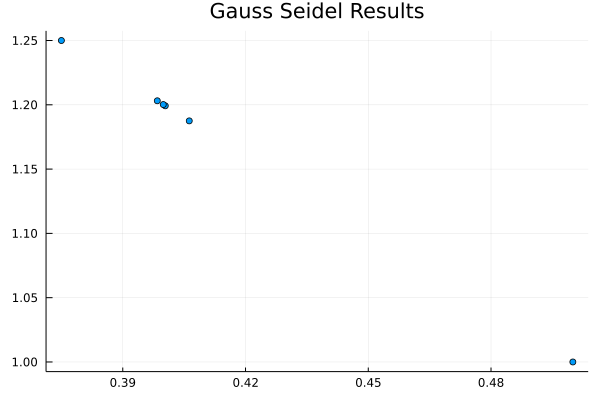

In [425]:
scatter(X_seidel,Y_seidel,leg=false, title="Gauss Seidel Results")

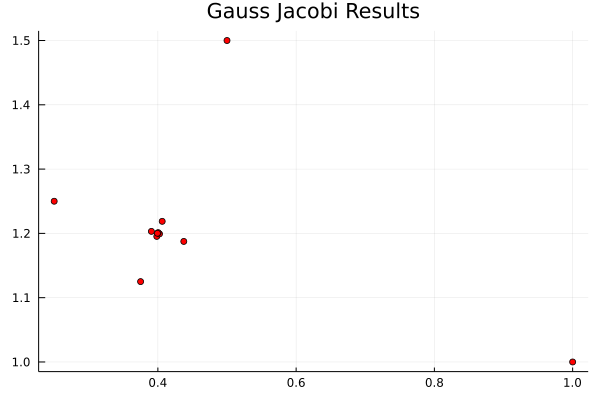

In [424]:
scatter(X_jacobi,Y_jacobi,color="red",leg=false, title="Gauss Jacobi Results")